In [34]:
### evaluate the classifier results

import pandas as pd
import os
import matplotlib.pyplot as plt

path_here = os.getcwd()

In [11]:
### for the classifier with bootstrapping

df_res_dev_boot_lr = pd.read_pickle(path_here+'/res/df_res_dev_boot_lr')
df_res_dev_boot_lstm = pd.read_pickle(path_here+'/res/df_res_dev_boot_lstm')

In [42]:
### draw the figures

### get the averaged value for each round for LR
res_dict_lr = dict()
ls = ['accuracy', 'precision', 'recall', 'F1']
for v in ls:
    res_dict_lr[v] =  []
for rd in range(5):
    for v in ls:
        res_dict_lr[v].append(df_res_dev_boot_lr.loc[range(rd,rd+3)][v].mean())
 


### get the averaged value for each round for LSTM
res_dict_lstm = dict()
ls = ['accuracy', 'precision', 'recall', 'F1']
for v in ls:
    res_dict_lstm[v] =  []
for rd in range(5):
    for v in ls:
        res_dict_lstm[v].append(df_res_dev_boot_lstm.loc[range(rd,rd+3)][v].mean())

# X-axis value
res_dict_lr['x_values'] = [str(i) for i in range(1,6)]
res_dict_lstm['x_values'] = [str(i) for i in range(1,6)]


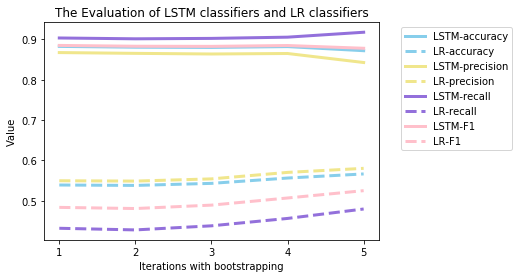

In [47]:
# plot the figures

color_list = ['skyblue', 'khaki', 'mediumpurple', 'pink', 'silver', 'green', 'yellow', 'olive', 'darkred','peru','tan']
linestyle = ["-","--"]

for inx, ValueType in enumerate(ls): 
    plt.plot( 'x_values', ValueType, data=res_dict_lstm, color=color_list[inx], linewidth=3, 
             linestyle = linestyle[0], label = 'LSTM-{}'.format(ValueType))
    plt.plot( 'x_values', ValueType, data=res_dict_lr, color=color_list[inx], linewidth=3, 
             linestyle = linestyle[1], label = 'LR-{}'.format(ValueType))
    

# show legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("The Evaluation of LSTM classifiers and LR classifiers")
plt.xlabel("Iterations with bootstrapping")
plt.ylabel("Value")


image_name = './res/Clf1.png'
image_format = 'png'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

# show graph
plt.show()
